In [ ]:
!pip install xgboost==2.0.2

In [4]:
!pip install xgboost==2.0.2


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
stock_symbol = "AAPL"  # Apple Inc.
start_date = "2022-01-01"
end_date = "2023-01-01"

# Use yfinance to download the stock data
apple_stock = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [7]:
apple_stock['Next_Close'] = apple_stock['Close'].shift(-1)

apple_stock = apple_stock[:-1]

# Display the first few rows to verify the target variable
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Next_Close
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900,179.699997
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,174.919998
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944000,94537600,172.000000
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056946,96904000,172.169998
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,172.190002


In [8]:
train_size = int(len(apple_stock) * 0.8)

# Split the data into training and testing sets
train_data = apple_stock.iloc[:train_size]
test_data = apple_stock.iloc[train_size:]

# Separate features and target variable for training data
X_train = train_data.drop('Next_Close', axis=1)
y_train = train_data['Next_Close']

# Separate features and target variable for testing data
X_test = test_data.drop('Next_Close', axis=1)
y_test = test_data['Next_Close']



In [9]:
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8           )

In [10]:
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print("MSE: ", rmse)

MSE:  20.835514649954856


In [11]:
comparison_df = pd.DataFrame({
    'Date' : X_test.index,
    'Actual_Close' : y_test,
    'Predicted_Close' : y_pred
})
comparison_df.reset_index(drop=True, inplace=True)
comparison_df.head()

,Date,Actual_Close,Predicted_Close
0,2022-10-19,143.389999,145.769958
1,2022-10-20,147.270004,143.410339
2,2022-10-21,149.449997,146.962967
3,2022-10-24,152.339996,144.283295
4,2022-10-25,149.350006,153.367218


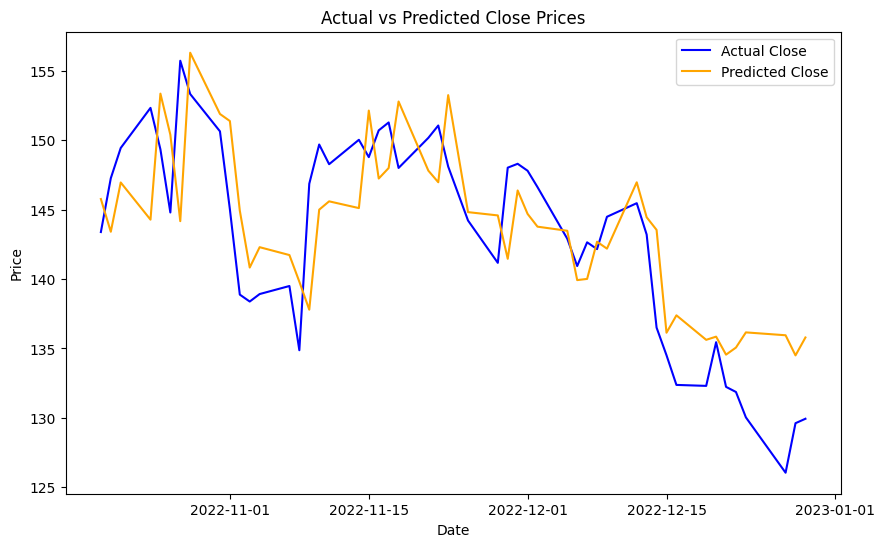

In [12]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size as needed
plt.plot(comparison_df['Date'], comparison_df['Actual_Close'],  label='Actual Close', color='blue')  # Plot actual close prices
plt.plot(comparison_df['Date'], comparison_df['Predicted_Close'], label='Predicted Close', color='orange')  # Plot predicted close prices

# Adding titles and labels
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Show the plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f86dace4-c215-40df-9ea2-a63cc39cfa4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>